In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

In [5]:
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)

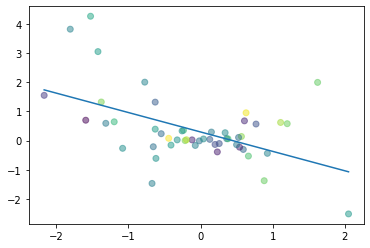

In [8]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c= colors, alpha=0.5)
plt.show()

In [24]:
x_values= list(range(11))
x_train = np.array(x_values, dtype= np.float32)
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

### y = 2x + 1

In [25]:
y_train = np.array([2 * i for i in x_values], dtype= np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [29]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

epochs= 100

for epoch in range(epochs):
    epoch += 1
    
    # Convert the numpy array to torch tensor
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate loss
    loss = criterion(outputs, labels)

    # getting gradients w.r.t parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print(f'epoch {epoch}, loss {loss.item()}')

    
# Looking at the predicted values
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
print(predicted)
print(y_train)

# Clear figure
plt.clf()

# plot true data
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)

plt.plot(x_train, predicted, '--', label='Predictions', alpha =0.5)

plt.legend(loc='best')
plt.show()

epoch 1, loss 169.5240478515625
epoch 2, loss 13.836087226867676
epoch 3, loss 1.1370205879211426
epoch 4, loss 0.10110335052013397
epoch 5, loss 0.016513381153345108
epoch 6, loss 0.009521296247839928
epoch 7, loss 0.008859739638864994
epoch 8, loss 0.008715497329831123
epoch 9, loss 0.008614437654614449
epoch 10, loss 0.00851796567440033
epoch 11, loss 0.008422795683145523
epoch 12, loss 0.008328774012625217
epoch 13, loss 0.008235756307840347
epoch 14, loss 0.008143778890371323
epoch 15, loss 0.008052856661379337
epoch 16, loss 0.007962936535477638
epoch 17, loss 0.007874023169279099
epoch 18, loss 0.007786066737025976
epoch 19, loss 0.007699113804847002
epoch 20, loss 0.007613149471580982
epoch 21, loss 0.007528115529567003
epoch 22, loss 0.007444089278578758
epoch 23, loss 0.007360939402133226
epoch 24, loss 0.007278747390955687
epoch 25, loss 0.007197439670562744
epoch 26, loss 0.007117079570889473
epoch 27, loss 0.007037600968033075
epoch 28, loss 0.006959037855267525
epoch 29, 